In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [2]:
raw_data = pd.read_csv('./1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Raw data - Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determine values of interest and drop the other ones

In [4]:
data = raw_data.drop(['Model'], axis=1)

### Dealing with missing values

In [5]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Brand  Price   Body  Mileage  EngineV  Engine Type  Registration   Year
0     False  False  False    False    False        False         False  False
1     False  False  False    False    False        False         False  False
2     False  False  False    False    False        False         False  False
3     False  False  False    False    False        False         False  False
4     False  False  False    False    False        False         False  False
...     ...    ...    ...      ...      ...          ...           ...    ...
4340  False  False  False    False    False        False         False  False
4341  False  False  False    False    False        False         False  False
4342  False  False  False    False    False        False         False  False
4343  False  False  False    False     True        False         False  False
4344  False  False  False    False    False        False         False  False

[

In [6]:
data_no_mv = data.dropna(axis=0)

## Exploring PDFs

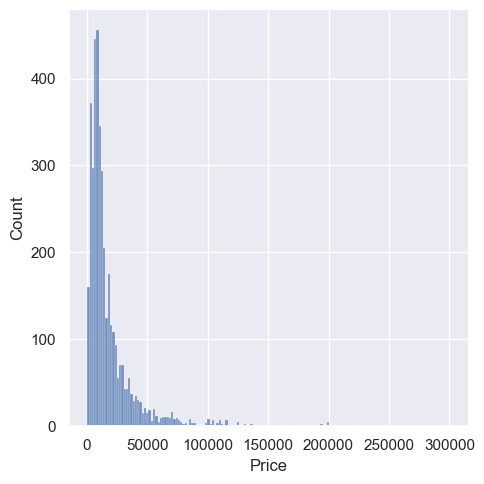

In [7]:
sns.displot(data_no_mv['Price'])

### Dealing with outliers and not showing them in the grand schemes

In [8]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
q = data_1['EngineV'].quantile(0.99)
data_2 = data_1[data_1['EngineV']<q]
q = data_2['Year'].quantile(0.99)
data_3 = data_2[data_2['Year']<q]
q = data_3['Mileage'].quantile(0.99)
data_4 = data_3[data_3['Mileage']<q]

### Final cleaning proccess

In [9]:
data_cleaned = data_4.reset_index(drop = True)

### Checking OLS assumptions

<function matplotlib.pyplot.show(close=None, block=None)>

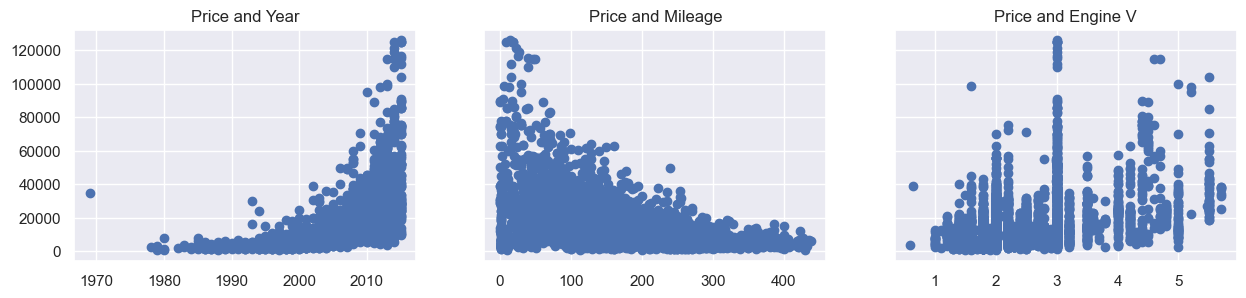

In [10]:
f,(ax1,ax2,ax3)=plt.subplots(1,3, sharey= True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title('Price and Mileage')

ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_title('Price and Engine V')

plt.show # if we spot patterns that are not linear we should transform a few variables

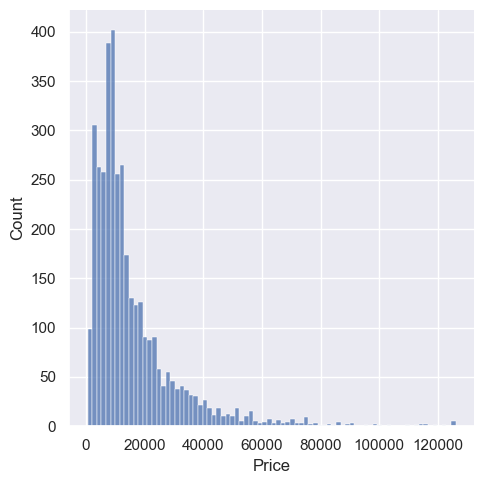

In [11]:
# We dont see linear patters we have to fix this

sns.displot(data_cleaned['Price'])

In [12]:
# For us to fix it we have to use the logarithms

log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3704,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3705,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3706,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557
3707,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,8.987197


<function matplotlib.pyplot.show(close=None, block=None)>

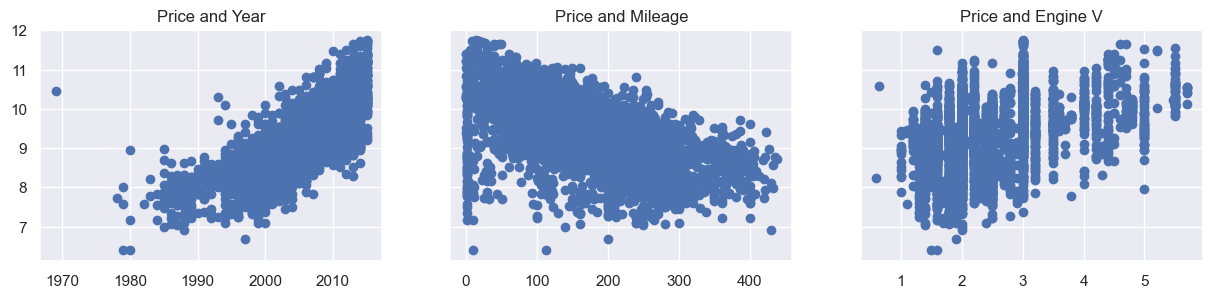

In [13]:
#Newer plots

f,(ax1,ax2,ax3)=plt.subplots(1,3, sharey= True, figsize=(15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax2.set_title('Price and Mileage')

ax3.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax3.set_title('Price and Engine V')

plt.show # if we spot patterns that are not linear we should transform a few variables

### Drop unneeded values

In [14]:
data_cleaned = data_cleaned.drop(['Price'],axis = 1)

### Endogeneity assumption
σ xε = 0 : ∀ x, ε                                                                                                               
Covariance of the error and independent variables should be 0 for all independent variables and error terms

### Normality & Homoscedasticity
ε ~ N (0, σ^2)                                                                                                                    -Normality                                                                                                                      -Zero Mean                                                                                                                      -Homoscedasticity

### No autocorrelation
σ εi εj= 0 : ∀ i≠j

## Check for multicollinearity

In [15]:
data_cleaned.columns.values
'''
VIF (Variable inflation factor)
|-->Can check multicollinearity import variance_inflation_factor
'''
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['Vif'] = [variance_inflation_factor (variables.values, i) for i in range (variables.shape[1])]
vif['features'] = variables.columns

##### Values For the VIF
##### VIF ε (1; +inf)
##### VIF = 1 : no multicollinearity
##### 1 < VIF < 5 : Perfectly OK
##### 5 | 7 | 10 (depending on users) < VIF : unnacceptable

In [16]:
data_no_mv_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

## Creating dummy variables

In [17]:
data_with_dummies = pd.get_dummies(data_no_mv_multicollinearity, drop_first = True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [18]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [19]:
cols=['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [20]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear regression model

In [21]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop('log_price', axis=1)

### Scale the data

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [23]:
inputs_scaled = scaler.transform(inputs)

### Train test split

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 365)

### Create regression

In [25]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [26]:
y_hat = reg.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

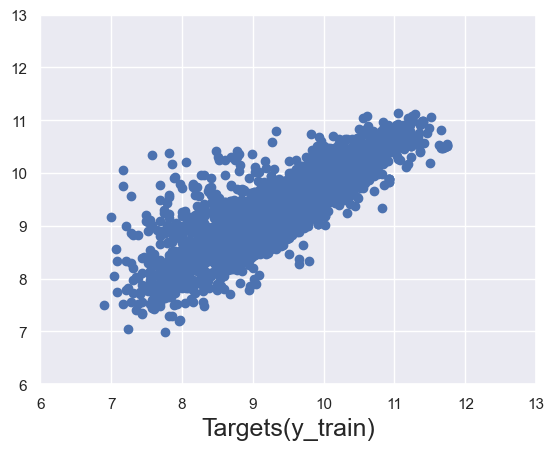

In [27]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show

Residuals = Difference between the targets and the predictors

Text(0.5, 1.0, 'Residuals PDF')

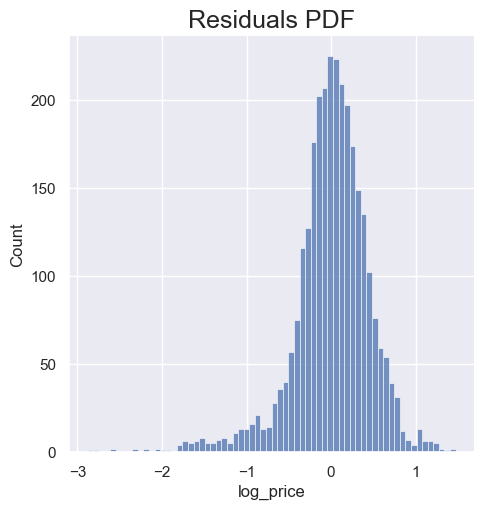

In [28]:
sns.displot(y_train - y_hat)
plt.title('Residuals PDF', size = 18)

Check now Normality and Homodasticity

In [29]:
reg.score(x_train, y_train)

0.7018245699935024

### Finding the weights and bias

In [30]:
reg.intercept_

9.316527863123941

In [31]:
reg.coef_

array([-0.40974651,  0.22246735,  0.00085668, -0.00274042, -0.13065487,
       -0.17139848, -0.04963808, -0.08521442, -0.15156213, -0.10313187,
       -0.19463816, -0.11988716, -0.15526989, -0.13640239, -0.02437779,
       -0.13892813,  0.31460402])

In [32]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.409747
1,EngineV,0.222467
2,Brand_BMW,0.000857
3,Brand_Mercedes-Benz,-0.002740
4,Brand_Mitsubishi,-0.130655
5,Brand_Renault,-0.171398
6,Brand_Toyota,-0.049638
7,Brand_Volkswagen,-0.085214
8,Body_hatch,-0.151562
9,Body_other,-0.103132


### Weights interpretation

- A positive weight shows that as a feature increases in value, so do the log_price and 'Price' respectively
- A negative weight shows that as a feature increases in value, log_price and 'Price decrease

In [33]:
data_cleaned['Brand'].unique

<bound method Series.unique of 0                 BMW
1       Mercedes-Benz
2       Mercedes-Benz
3                Audi
4              Toyota
            ...      
3704           Toyota
3705    Mercedes-Benz
3706              BMW
3707              BMW
3708       Volkswagen
Name: Brand, Length: 3709, dtype: object>

### II Dummy Variables

- A positive weight shows that the respective category (Brand) is more expensive than the benchmark, Audi
- A negative weight shows that the respective category (Brand) is less expensive than the benchmark, Audi                       

The bigger the weight, the bigger the impact

## Testing

In [34]:
y_hat_test = reg.predict(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

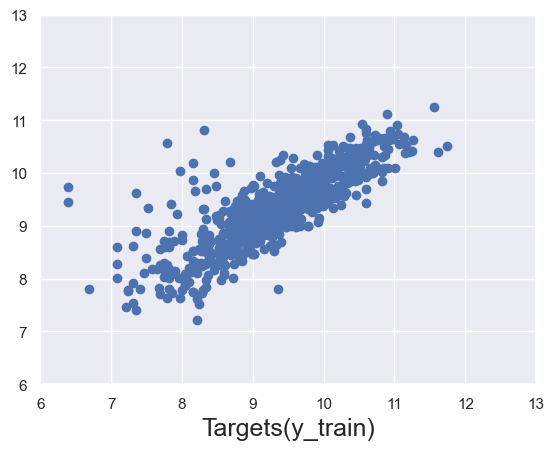

In [35]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets(y_train)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show

In [36]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.324447
1,9.207072
2,10.348446
3,8.907218
4,8.636232


It gives you the values in logarithms where they should be exponential instead, we have to change this in the following way

In [37]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,11208.712748
1,9967.370298
2,31208.495158
3,7385.084830
4,5632.070908


In [38]:
df_pf['Target'] = np.exp(y_test)
df_pf #it used to give the values unorganized and randomly

,Prediction,Target
0,11208.712748,NaN
1,9967.370298,NaN
2,31208.495158,NaN
3,7385.084830,NaN
4,5632.070908,NaN
...,...,...
737,41280.251837,NaN
738,35289.149931,NaN
739,19693.956264,NaN
740,41095.867683,NaN


In [39]:
y_test #here it does gives us the values in an unorganized way

984      8.318742
18       8.922658
3171    10.621327
3126     8.764053
3264     8.294050
          ...    
1287    10.924138
3182    10.451609
2097     9.615139
2639    10.609057
333      8.160518
Name: log_price, Length: 742, dtype: float64

In [40]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     8.318742
1     8.922658
2    10.621327
3     8.764053
4     8.294050
Name: log_price, dtype: float64

In [41]:
df_pf['Target'] = np.exp(y_test)
df_pf #it is now also organized

,Prediction,Target
0,11208.712748,4100.0
1,9967.370298,7500.0
2,31208.495158,41000.0
3,7385.084830,6400.0
4,5632.070908,4000.0
...,...,...
737,41280.251837,55500.0
738,35289.149931,34600.0
739,19693.956264,14990.0
740,41095.867683,40500.0


### Difference in between actual values and predictions

In [42]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [43]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,11208.712748,4100.0,-7108.712748,173.383238
1,9967.370298,7500.0,-2467.370298,32.898271
2,31208.495158,41000.0,9791.504842,23.881719
3,7385.084830,6400.0,-985.084830,15.391950
4,5632.070908,4000.0,-1632.070908,40.801773
...,...,...,...,...
737,41280.251837,55500.0,14219.748163,25.621168
738,35289.149931,34600.0,-689.149931,1.991763
739,19693.956264,14990.0,-4703.956264,31.380629
740,41095.867683,40500.0,-595.867683,1.471278


In [44]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,742.000000,742.000000,742.000000,742.000000
mean,13875.483500,15430.720876,1555.237376,48.856550
std,9989.360140,14333.944798,8807.486401,155.980219
min,1353.465854,600.000000,-45729.885670,0.111046
25%,7098.773024,6712.500000,-1730.989861,11.058329
50%,11237.041870,10625.000000,305.280381,24.785825
75%,17857.110733,19200.000000,3247.101211,42.182982
max,76394.615891,125000.000000,88443.335361,2731.530263


In [46]:
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
49,11512.770269,11500.0,-12.770269,0.111046
139,9888.385727,9900.0,11.614273,0.117316
622,26970.854529,26900.0,-70.854529,0.263400
312,10857.513267,10888.0,30.486733,0.280003
219,8669.700659,8700.0,30.299341,0.348268
...,...,...,...,...
236,14971.372278,1550.0,-13421.372278,865.894986
581,49829.885670,4100.0,-45729.885670,1115.363065
215,39095.729415,2400.0,-36695.729415,1528.988726
398,12800.607682,600.0,-12200.607682,2033.434614


It doesn't show the complete information, it is limited. We can fix it with:

In [51]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf_sorted = df_pf.sort_values(by=['Difference%'])
df_pf_sorted

,Prediction,Target,Residual,Difference%
49,11512.77,11500.00,-12.77,0.11
139,9888.39,9900.00,11.61,0.12
622,26970.85,26900.00,-70.85,0.26
312,10857.51,10888.00,30.49,0.28
219,8669.70,8700.00,30.30,0.35
71,7226.96,7200.00,-26.96,0.37
590,5969.48,6000.00,30.52,0.51
295,26651.35,26800.00,148.65,0.55
247,20373.62,20500.00,126.38,0.62
444,6295.02,6250.00,-45.02,0.72
